<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability


In this notebook, we illustrate some basic concepts from probability theory using Python code.




In [1]:


import os
import time
import numpy as np
np.set_printoptions(precision=3)
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

import sklearn
import scipy.stats as stats
import scipy.optimize

import seaborn as sns;
sns.set(style="ticks", color_codes=True)

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows



# Software libraries 

There are several software libraries that implement standard probability distributions, and functions for manipulating them (e.g., sampling, fitting). We list some below.


* [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)  We illustrate how to use this below.

* [Tensorflow probability (TFP)](https://www.tensorflow.org/api_docs/python/tf/distributions)
Similar API to scipy.stats.

* [Distrax](https://github.com/deepmind/distrax) JAX version of TFP.

* [Pytorch distributions library](https://pytorch.org/docs/stable/distributions.html). Similar to TFP.


* [NumPyro distributions library](https://numpyro.readthedocs.io/en/latest/distributions.html) has a similar interface to PyTorch distributions, but uses JAX as the backend.
 
 
In this notebook, we mostly focus on scipy.stats.

# Basics of Probability theory



## What is probability?

We will not go into mathematical detail, but focus on intuition.

*   Two main "schools of thought"
*   **Bayesian probability** = degree of belief
  * $p(heads=1)=0.5$ means you think the event that a particular coin will land heads is 50% likely. 
* **Frequentist probability** = long run frequencies
  * $p(heads=1)=0.5$ means that the empirical fraction of times this event will occur across infinitely repeated trials is 50%
* In practice, the philosophy does not matter much, since both interpretations must satisfy the same basic axioms


## Random variables and their distributions

*   Let $X$ be a (discrete) **random variable** (RV) with $K$ possible values  $\mathcal{X}  = \{1,...,K\}$.
*   Let $X=x$ be the **event** that $X$ has value $x$, for some state $x \in \cal{X}$.
* We require $0 \leq p(X=x) \leq 1$
* We require
     $$\sum_{x \in  \cal{X}} p(X=x) = 1$$
* Let $p(X) = [p(X=1), …, p(X=K)]$ be the distribution or **probability mass function** (pmf) for RV $X$.
* We can generalize this to continuous random variables, which have an infinite number of possible states, using a **probability density function** (pdf) which satisfies
$$
    \int_{x \in \cal{X}} p(X=x) dx = 1
    $$

## Conjunction and disjunction of events
*   The probability of events $X=x$ AND $Y=y$ is denoted $p(X=x \land Y=y)$ or just $p(X=x,Y=y)$.

*   If two RVs are **independent**, then 
$$p(X, Y) = p(X) * p(Y)$$.




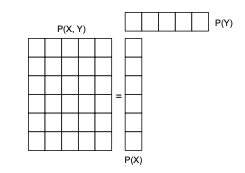




*   The probability of event $X=x$ OR $Y=y$ is 
$$p(X=x \lor Y=y) = p(X=x) + p(Y=y) - p(X=x \land Y=y)$$
*   For disjoint events (that cannot co-occur), this becomes
$$p(X=x \lor Y=y) = p(X=x) + p(Y=y)$$

## Conditional probability, sum rule, product rule, Bayes rule 

* The **conditional probability** of Y=y given X=x is defined to be

 $$   p(Y=y|X=x) = \frac{p(X=x,Y=y)}{p(X=x)} $$

* Hence we derive the **product rule**
 $$ 
 \begin{align}
   p(X=x, Y=y) &= p(Y=y|X=x) * p(X=x)\\
              &= p(X=x|Y=y) * p(Y=y) 
              \end{align}
  $$

* If $X$ and $Y$ are independent, then $p(Y|X)=p(Y)$ and $p(X|Y)=p(X)$, so
  $p(X,Y)=p(X) p(Y)$.

* The marginal probability of $X=x$ is given by the **sum rule**
   $$ p(X=x) = \sum_y p(X=x, Y=y)$$

* Hence we derive **Bayes' rule**
   $$
   \begin{align}
   p(Y=y|X=x) &= p(X=x,Y=y) /  p(X=x)\\
   &=\frac{p(X=x|Y=y) * p(Y=y)}
   {\sum_{y'} p(X=x|Y=y) * p(Y=y)}
   \end{align}
   $$

## Bayesian inference

Bayes rule is often used to compute a distribution over possible values of a **hidden variable** or **hypothesis** $h \in \cal{H}$ after observing some evidence $Y=y$. We can write this as follows:

$$
\begin{align}
p(H=h|Y=y) &= \frac{p(H=h) p(Y=y|H=h)}{p(Y=y)} \\
\text{posterior}(h|y) &= \frac{\text{prior}(h) * \text{likelihood}(y|h)}{\text{marginal-likelihood}(y)}
 \end{align}
 $$ 

* The **prior** encodes what we believe about the state before we see any data.
* The **likelihood** is the probability of observing the data given each possible hidden state. 
* The **posterior** is our new belief state, after seeing the data.
* The **marginal likelihood** is a normalization constant, independent of the hidden state, so can usually be ignored.

Applying Bayes rule to infer a hidden quantity from one or more observations is called **Bayesian inference** or **posterior inference**. (It used to be called **inverse probability**, since it reasons backwards from effects to causes.)

## Example: Bayes rule for COVID diagnosis

Consider estimating if someone has COVID $H=1$ or not $H=0$ on the basis of a PCR test. The test can either return a positive result $Y=1$ or a negative result $Y=0$. The reliability of the test is given by the following observation model.

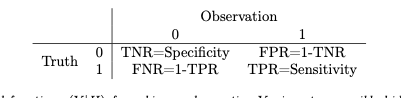

Using data from https://www.nytimes.com/2020/08/04/science/coronavirus-bayes-statistics-math.html, we set sensitivity to 87.5\% and the specificity to 97.5\%.

We also need to specify the prior probability $p(H=1)$; this is known as the prevalence. This varies over time and place, but let's pick $p(H=1)=0.1$ as a reasonable estimate.



If you test positive:

\begin{align}
p(H=1|Y=1) 
 &= \frac{p(Y=1|H=1) p(H=1)}
{p(Y=1|H=1) p(H=1) + p(Y=1|H=0) p(H=0)}
= 0.795
\end{align}

If you test negative:
\begin{align}
p(H=1|Y=0) 
 &= \frac{p(Y=0|H=1) p(H=1)}
{p(Y=0|H=1) p(H=1) + p(Y=0|H=0) p(H=0)}
=0.014
\end{align}

## Code to reproduce the above.

In [2]:
def normalize(x):
  return x / np.sum(x)

def posterior_covid(observed, prevalence=None, sensitivity=None):
  # observed = 0 for negative test, 1 for positive test
  # hidden state = 0 if no-covid, 1 if have-covid
  if sensitivity is None:
    sensitivity = 0.875
  specificity = 0.975
  TPR = sensitivity; 
  FNR = 1-TPR
  TNR = specificity
  FPR = 1-TNR
  # likelihood(hidden, obs)
  likelihood_fn = np.array([[TNR, FPR], [FNR, TPR]])
  # prior(hidden)
  if prevalence is None:
    prevalence = 0.1
  prior = np.array([1-prevalence, prevalence])
  likelihood = likelihood_fn[:, observed].T
  posterior = normalize(prior * likelihood)
  return posterior

For a prevalence of $p(H=1)=0.1$

In [ ]:
print(posterior_covid(1)[1]*100)
print(posterior_covid(0)[1]*100)


79.54545454545453
1.4044943820224722


For a prevalence of $p(H=1)=0.01$

In [3]:

print(posterior_covid(1, 0.01)[1]*100) # positive test 
print(posterior_covid(0, 0.01)[1]*100) # negative test

26.119402985074615
0.12933264355923438


In [4]:
pop = 100000
infected = 0.01*pop
sens = 87.5/100
spec = 97.5/100
FPR = 1-spec
FNR = 1-sens
print([FPR, FNR])
true_pos = sens * infected
false_pos = FPR * (pop-infected)
num_pos = true_pos + false_pos
posterior = true_pos/num_pos
print([infected, true_pos, false_pos, num_pos, posterior])

[0.025000000000000022, 0.125]
[1000.0, 875.0, 2475.0000000000023, 3350.0000000000023, 0.2611940298507461]


# Univariate distributions

## Univariate Gaussian (normal)  <a class="anchor" id="scipy-unigauss"></a>


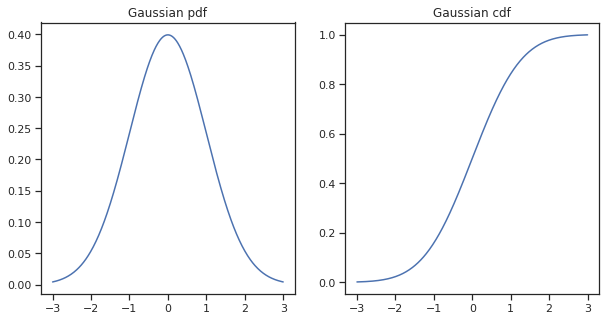

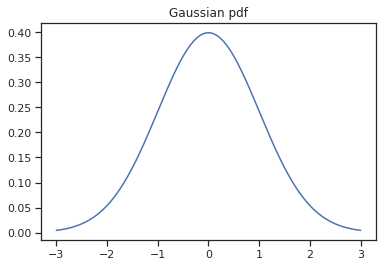

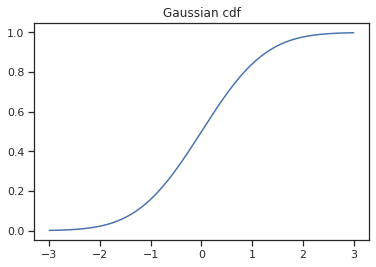

In [ ]:
from scipy.stats import norm 

rv = norm(0, 1) # standard normal

fig, ax = plt.subplots(1,2, figsize=(10,5))
X = np.linspace(-3, 3, 500)
ax[0].plot(X, rv.pdf(X))
ax[0].set_title("Gaussian pdf")
ax[1].plot(X, rv.cdf(X))
ax[1].set_title("Gaussian cdf")
plt.show()


plt.figure()
plt.plot(X, rv.pdf(X))
plt.title("Gaussian pdf")

plt.figure()
plt.plot(X, rv.cdf(X))
plt.title("Gaussian cdf")

plt.show()


In [ ]:
# Samples

np.random.seed(42)
mu = 1.1
sigma = 0.1
dist = norm(loc=mu, scale=sigma) # create "frozen" distribution
N = 10
x = dist.rvs(size=N) # draw N random samples
print(x.shape)
print(x)

np.random.seed(42)
x2 = norm(mu, sigma).rvs(size=N)
assert np.allclose(x, x2)



(10,)
[1.15  1.086 1.165 1.252 1.077 1.077 1.258 1.177 1.053 1.154]


In [ ]:
# pdf, cdf, inverse cdf

logprob = dist.logpdf(x) # evaluate log probability of each sample
print(logprob.shape)

p = dist.cdf(x)
x3 = dist.ppf(p) # inverse CDF
assert np.allclose(x, x3)

(10,)


## Gamma distribution  <a class="anchor" id="scipy-gamma"></a>

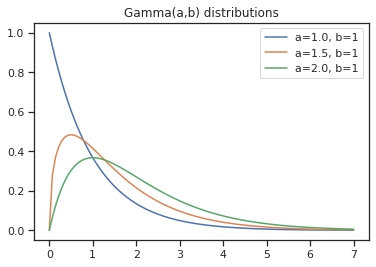

In [ ]:
from scipy.stats import gamma

x = np.linspace(0, 7, 100)
b = 1
plt.figure()
for a in [1, 1.5, 2]:
    y = gamma.pdf(x, a, scale=1/b, loc=0)
    plt.plot(x, y)
plt.legend(['a=%.1f, b=1' % a for a in [1, 1.5, 2]])
plt.title('Gamma(a,b) distributions')
#save_fig('gammaDistb1.pdf')
plt.show()


## Zipf's law <a class="anchor" id="zipf"></a>

In this section, we study the empirical word frequencies derived from H. G. Wells' book [The time machine](https://en.wikipedia.org/wiki/The_Time_Machine).
Our code is based on https://github.com/d2l-ai/d2l-en/blob/master/chapter_recurrent-neural-networks/lang-model.md


In [ ]:
import collections
import re
import urllib

url = 'https://raw.githubusercontent.com/probml/pyprobml/master/data/timemachine.txt' 
bytes = urllib.request.urlopen(url).read()
string = bytes.decode('utf-8')
words = string.split()
print(words[:10])
words = [re.sub('[^A-Za-z]+', ' ', w.lower()) for w in words]
print(words[:10])


['The', 'Time', 'Machine,', 'by', 'H.', 'G.', 'Wells', '[1898]', 'I', 'The']
['the', 'time', 'machine ', 'by', 'h ', 'g ', 'wells', ' ', 'i', 'the']


In [ ]:
# Convert sequence of words into sequence of n-grams for different n

# Unigrams
wseq = words # [tk for st in raw_dataset for tk in st]
print('First 10 unigrams\n', wseq[:10])

# Bigrams
word_pairs = [pair for pair in zip(wseq[:-1], wseq[1:])]
print('First 10 bigrams\n', word_pairs[:10])

# Trigrams
word_triples = [triple for triple in zip(wseq[:-2], wseq[1:-1], wseq[2:])]
print('First 10 trigrams\n', word_triples[:10])

First 10 unigrams
 ['the', 'time', 'machine ', 'by', 'h ', 'g ', 'wells', ' ', 'i', 'the']
First 10 bigrams
 [('the', 'time'), ('time', 'machine '), ('machine ', 'by'), ('by', 'h '), ('h ', 'g '), ('g ', 'wells'), ('wells', ' '), (' ', 'i'), ('i', 'the'), ('the', 'time')]
First 10 trigrams
 [('the', 'time', 'machine '), ('time', 'machine ', 'by'), ('machine ', 'by', 'h '), ('by', 'h ', 'g '), ('h ', 'g ', 'wells'), ('g ', 'wells', ' '), ('wells', ' ', 'i'), (' ', 'i', 'the'), ('i', 'the', 'time'), ('the', 'time', 'traveller')]


In [ ]:
# ngram statistics

counter = collections.Counter(wseq)
counter_pairs = collections.Counter(word_pairs)
counter_triples = collections.Counter(word_triples)

wordcounts = [count for _,count in counter.most_common()]
bigramcounts = [count for _,count in counter_pairs.most_common()]
triplecounts = [count for _,count in counter_triples.most_common()]

print('Most common unigrams\n', counter.most_common(10))
print('Most common bigrams\n', counter_pairs.most_common(10))
print('Most common trigrams\n', counter_triples.most_common(10))

Most common unigrams
 [('the', 2232), ('and', 1197), ('i', 1176), ('of', 1147), ('a', 800), ('to', 671), ('was', 537), ('in', 535), ('my', 435), ('that', 404)]
Most common bigrams
 [(('of', 'the'), 309), (('in', 'the'), 168), (('i', 'had'), 127), (('and', 'the'), 109), (('i', 'was'), 107), (('the', 'time'), 93), (('it', 'was'), 88), (('to', 'the'), 85), (('of', 'a'), 71), (('as', 'i'), 70)]
Most common trigrams
 [(('the', 'time', 'traveller'), 32), (('the', 'time', 'traveller '), 20), (('the', 'time', 'machine '), 19), (('the', 'medical', 'man '), 17), (('it', 'seemed', 'to'), 15), (('i', 'did', 'not'), 14), (('i', 'began', 'to'), 13), (('it', 'was', 'a'), 13), (('said', 'the', 'time'), 12), (('out', 'of', 'the'), 12)]


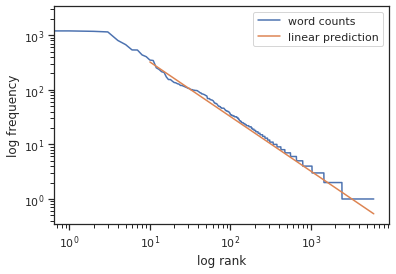

In [ ]:
# Word frequency is linear on log-log scale
plt.figure()
plt.loglog(wordcounts, label='word counts');
plt.ylabel('log frequency')
plt.xlabel('log rank')

# Prediction from Zipf's law, using manually chosen parameters.
# We omit the first 'skip' words, which don't fit the prediction well.
skip = 10.0
x = np.arange(skip, len(wordcounts)) 
N = np.sum(wordcounts)
kappa = 0.1
a = -1
y = kappa*np.power(x, a) * N # predicted frequency for word with rank x
plt.loglog(x, y, label='linear prediction')

plt.legend()
plt.show()


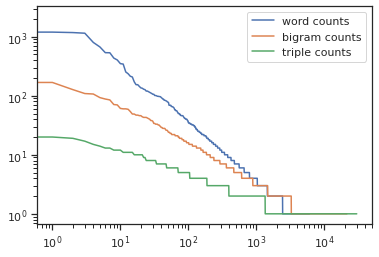

In [ ]:
# The number of unique n-grams is smaller for larger n.
# But n-gram statistics also exhibit a power law.

plt.figure()
plt.loglog(wordcounts, label='word counts');
plt.loglog(bigramcounts, label='bigram counts');
plt.loglog(triplecounts, label='triple counts');
plt.legend();
plt.show()


# Multivariate Gaussian (normal)  <a class="anchor" id="scipy-multigauss"></a>

In [ ]:
from scipy.stats import multivariate_normal as mvn

D = 5
np.random.seed(42)
mu = np.random.randn(D)
A = np.random.randn(D,D)
Sigma = np.dot(A, A.T)

dist = mvn(mu, Sigma)
X = dist.rvs(size=10)
print(X.shape) 

(10, 5)


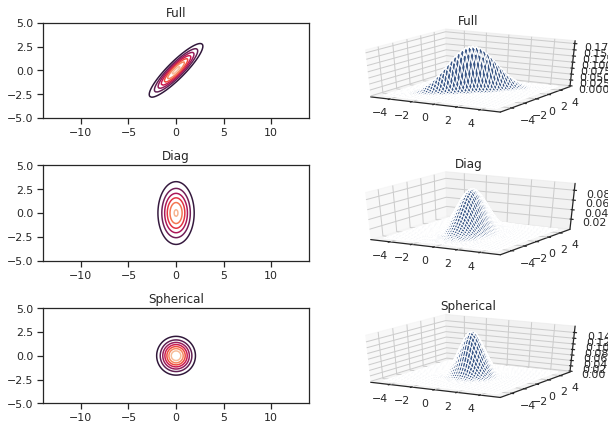

In [ ]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

names = ["Full", "Diag", "Spherical"]

mu = [0, 0]
Covs = {'Full': [[2, 1.8], [1.8, 2]],
        'Diag': [[1, 0], [0, 3]],
        'Spherical': [[1, 0], [0, 1]]}

N = 100
points = np.linspace(-5, 5, N)
X, Y = np.meshgrid(points, points)
xs = X.reshape(-1)
ys = Y.reshape(-1)
grid = np.vstack([xs, ys]).T # N^2 * 2

fig = plt.figure(figsize=(10,7))
fig.subplots_adjust(hspace=0.5, wspace=0.1)
fig_counter = 1
for i in range(len(Covs)):
    name = names[i]
    Sigma = Covs[name]
    ps = mvn(mu, Sigma).pdf(grid)
    P = ps.reshape((N,N))

    ax = fig.add_subplot(3, 2, fig_counter)
    ax.contour(X, Y, P)
    ax.axis('equal') # make circles look circular
    ax.set_title(name)
    fig_counter = fig_counter + 1
    
    ax = fig.add_subplot(3, 2, fig_counter, projection='3d')
    ax.plot_surface(X, Y, P, rstride=2, cstride=2)
    ax.set_title(name)
    fig_counter = fig_counter + 1
plt.show()

Illustrate correlation coefficient.

Code is from [Bayesian Analysis with Python, ch. 3](https://github.com/aloctavodia/BAP/blob/master/code/Chp3/03_Modeling%20with%20Linear%20Regressions.ipynb)

Text(-0.05, 0.5, 'x_2')

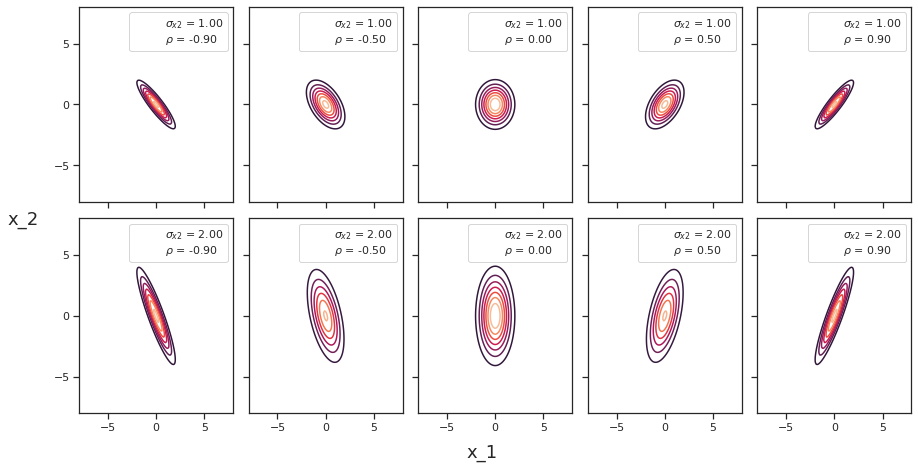

In [ ]:

sigma_x1 = 1
sigmas_x2 = [1, 2]
rhos = [-0.90, -0.5, 0, 0.5, 0.90]

k, l = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(k.shape + (2,))
pos[:, :, 0] = k
pos[:, :, 1] = l

f, ax = plt.subplots(len(sigmas_x2), len(rhos),
                     sharex=True, sharey=True, figsize=(12, 6),
                     constrained_layout=True)
for i in range(2):
    for j in range(5):
        sigma_x2 = sigmas_x2[i]
        rho = rhos[j]
        cov = [[sigma_x1**2, sigma_x1*sigma_x2*rho],
               [sigma_x1*sigma_x2*rho, sigma_x2**2]]
        rv = stats.multivariate_normal([0, 0], cov)
        ax[i, j].contour(k, l, rv.pdf(pos))
        ax[i, j].set_xlim(-8, 8)
        ax[i, j].set_ylim(-8, 8)
        ax[i, j].set_yticks([-5, 0, 5])
        ax[i, j].plot(0, 0,
                      label=f'$\\sigma_{{x2}}$ = {sigma_x2:3.2f}\n$\\rho$ = {rho:3.2f}', alpha=0)
        ax[i, j].legend()
f.text(0.5, -0.05, 'x_1', ha='center', fontsize=18)
f.text(-0.05, 0.5, 'x_2', va='center', fontsize=18, rotation=0)